In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load datasets
sensex = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\BSE Sensex Data.xlsx")
bonds = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\India Bond Yeild Data.xlsx")
nifty_50 = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\Nifty 50 Data.xlsx") 
gold = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\Gold Rates Data.xlsx")
USD_INR = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\USD_INR Data.xlsx")

# Check the structure of the datasets
print("Sensex Data:")
print(sensex.head())
print("\nBonds Data:")
print(bonds.head())
print("\nNifty 50 Data:")
print(nifty_50.head())
print("\nGold Data:")
print(gold.head())
print("\nUSD_INR Data:")
print(USD_INR.head())

Sensex Data:
        Date     Price      Open      High       Low  Change %
0 2024-03-01  73651.35  72606.31  74245.17  71674.42    0.0159
1 2024-02-01  72500.30  71998.78  73413.93  70809.84    0.0104
2 2024-01-01  71752.11  72218.39  73427.59  70001.60   -0.0068
3 2023-12-01  72240.26  67181.15  72484.34  67149.07    0.0784
4 2023-11-01  66988.44  63829.87  67069.89  63550.46    0.0487

Bonds Data:
        Date  Price   Open   High    Low  Change %
0 2024-03-01  7.052  7.052  7.052  7.052   -0.0037
1 2024-02-01  7.078  7.078  7.078  7.078   -0.0092
2 2024-01-01  7.144  7.207  7.239  7.134   -0.0045
3 2023-12-01  7.176  7.293  7.298  7.147   -0.0142
4 2023-11-01  7.279  7.376  7.376  7.194   -0.0098

Nifty 50 Data:
        Date     Price      Open      High      Low  Change %
0 2024-03-01  22326.90  22048.30  22526.60  21710.2    0.0157
1 2024-02-01  21982.80  21780.65  22297.50  21530.2    0.0118
2 2024-01-01  21725.70  21727.75  22124.15  21137.2   -0.0003
3 2023-12-01  21731.40  20

In [2]:
# Function to calculate daily returns
def calculate_daily_returns(df):
    df['Return'] = df['Price'].pct_change()
    return df

# Apply the function to all datasets
sensex = calculate_daily_returns(sensex)
bonds = calculate_daily_returns(bonds)
nifty_50 = calculate_daily_returns(nifty_50)
gold = calculate_daily_returns(gold)
USD_INR = calculate_daily_returns(USD_INR)

# Combine all returns into a single DataFrame
returns = pd.DataFrame({
    'Sensex': sensex['Return'],
    'Bonds': bonds['Return'],
    'Nifty 50': nifty_50['Return'],
    'Gold': gold['Return'],
    'USD_INR': USD_INR['Return']
})

# Drop NaN values
returns = returns.dropna()

print("Daily Returns Data:")
print(returns.head())

Daily Returns Data:
     Sensex     Bonds  Nifty 50      Gold   USD_INR
1 -0.015628  0.003687 -0.015412 -0.077410 -0.005399
2 -0.010320  0.009325 -0.011696  0.001314  0.002352
3  0.006803  0.004479  0.000262  0.006999  0.001143
4 -0.072699  0.014353 -0.073546 -0.016266  0.002007
5 -0.046478  0.009891 -0.052329 -0.021491 -0.001212


In [4]:
# returns.to_csv('Returns_Data.csv')

In [65]:
df = pd.read_csv(r"C:\Users\Sandesh\Project\NMIMS Project\Returns Data.csv")
df

,Date,Sensex,Bonds,Nifty 50,Gold,USD_INR
0,01-03-2024,-0.015628,0.003687,-0.015412,-0.077410,-0.005399
1,01-02-2024,-0.010320,0.009325,-0.011696,0.001314,0.002352
2,01-01-2024,0.006803,0.004479,0.000262,0.006999,0.001143
3,01-12-2023,-0.072699,0.014353,-0.073546,-0.016266,0.002007
4,01-11-2023,-0.046478,0.009891,-0.052329,-0.021491,-0.001212
...,...,...,...,...,...,...
115,01-08-2014,-0.027898,0.018577,-0.029298,-0.003573,0.000744
116,01-07-2014,-0.018582,0.002982,-0.014240,0.030558,-0.008340
117,01-06-2014,-0.047078,-0.011322,-0.050109,-0.057489,-0.014406
118,01-05-2014,-0.074308,0.021168,-0.073797,0.040048,0.019601


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      119 non-null    object 
 1   Sensex    119 non-null    float64
 2   Bonds     119 non-null    float64
 3   Nifty 50  119 non-null    float64
 4   Gold      119 non-null    float64
 5   USD_INR   119 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.8+ KB


In [67]:
print(df.describe())

           Sensex       Bonds    Nifty 50        Gold     USD_INR
count  119.000000  119.000000  119.000000  119.000000  119.000000
mean    -0.008803    0.002212   -0.008914   -0.003775   -0.002602
std      0.049039    0.025627    0.049342    0.039112    0.014819
min     -0.126021   -0.067394   -0.128008   -0.095593   -0.037155
25%     -0.037399   -0.013609   -0.038219   -0.028983   -0.012856
50%     -0.010340    0.002884   -0.011696   -0.000495   -0.001950
75%      0.014809    0.019938    0.016252    0.022517    0.006061
max      0.299601    0.102835    0.302870    0.084505    0.061890


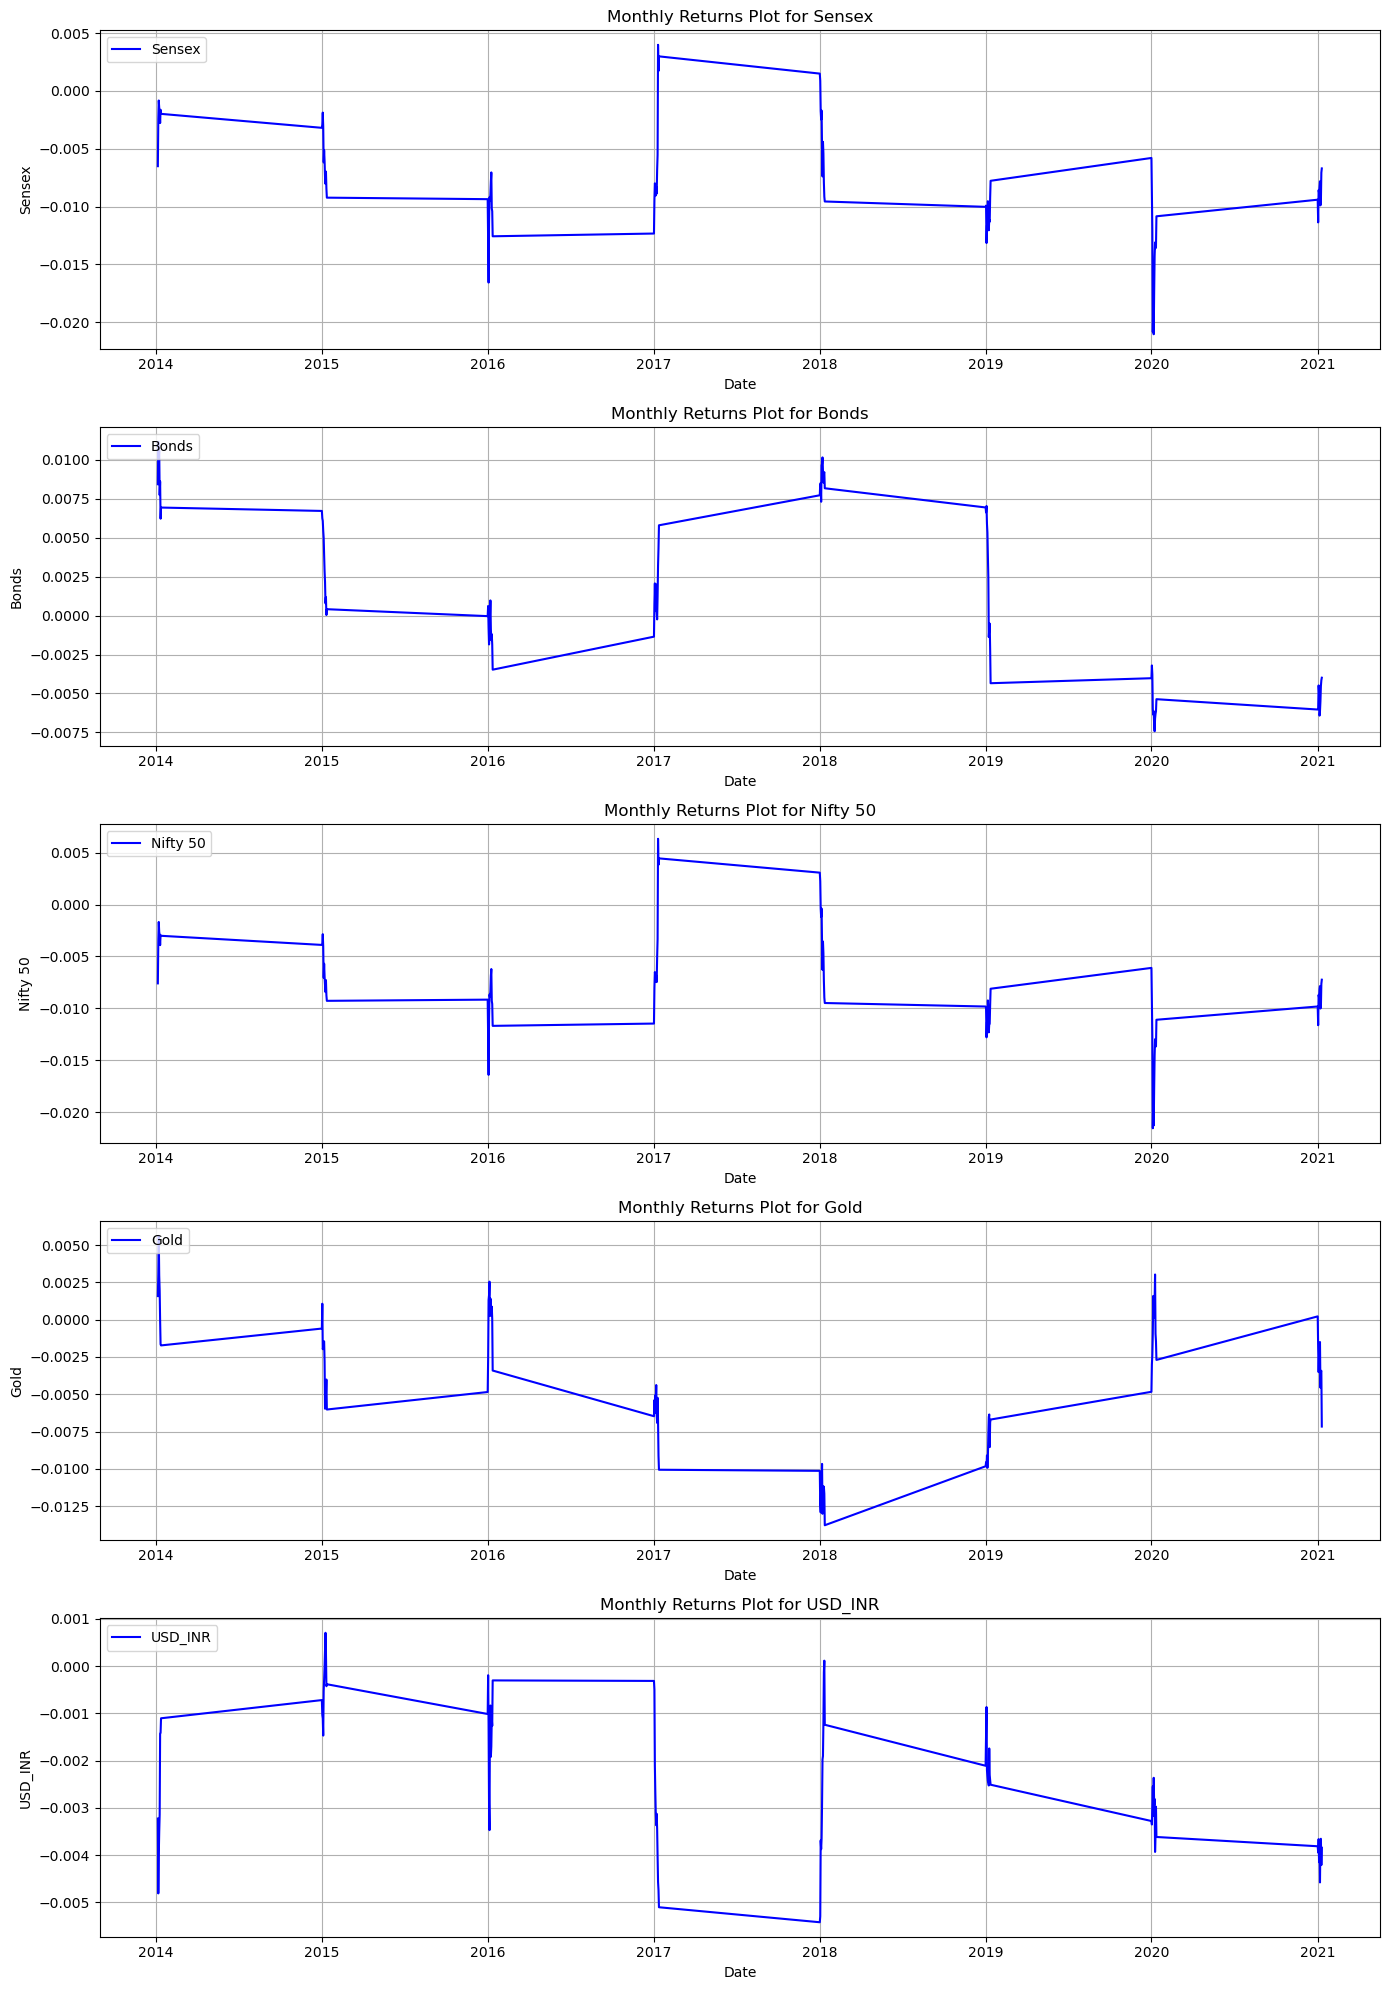

In [68]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the date as the index for easier time series plotting
df.set_index('Date', inplace=True)

# Define the number of columns to plot
num_columns = len(df.select_dtypes(include=['float64', 'int64']).columns)

# Set up the figure with subplots
plt.figure(figsize=(14, num_columns * 4))

# Plot each column in a separate subplot with smoothing
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(num_columns, 1, i)
    
    # Apply rolling mean (window size = 30 days for smoothing)
    smoothed_data = df[column].rolling(window=30).mean()
    
    # Plot the smoothed data
    plt.plot(df.index, smoothed_data, label=f'{column}', color='b')
    plt.title(f'Monthly Returns Plot for {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend(loc='upper left')
    plt.grid(True)

plt.tight_layout()  # Adjusts spacing between plots
plt.show()